In [65]:
import pandas as pd

In [131]:
data=pd.read_csv('spam_and_ham_classification.csv',encoding='ISO-8859-1')

In [135]:
data

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...
...,...,...
9984,ham,this would be a great tragedy for all concerne...
9985,ham,"hello , welcome to medzonline filamentous shop..."
9986,ham,this is amazing stuff add some inches fast saf...
9987,spam,author jra date escapenumber escapenumber esca...


In [136]:
import nltk
import string
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
stopwords=nltk.corpus.stopwords.words('english')


In [98]:
def cleaning(text):
    clean=''.join([i for i in text if i not in string.punctuation])
    clean=clean.lower()
    clean=nltk.word_tokenize(clean)
    clean = [i for i in clean if i not in stopwords]
    clean=[stemmer.stem(word) for word in clean]
    clean=' '.join(word for word in clean)
    return clean


In [99]:
data['cleanmsg']=data['v2'].apply(lambda x: cleaning(x))

In [100]:
data['cleanmsg']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: cleanmsg, Length: 5572, dtype: object

In [29]:
data['cleanmsg']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: cleanmsg, Length: 5572, dtype: object

In [101]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Embedding,Input,LSTM
from tensorflow.keras.models import Sequential

In [ ]:
vocab_size=20000
sent_length=200
dim=40

data['embed']=data['cleanmsg'].apply(lambda x: one_hot(x,vocab_size))

In [77]:
data['embed'][0]


[1915,
 8999,
 1996,
 9034,
 5646,
 9534,
 3325,
 9178,
 3429,
 4202,
 6797,
 5964,
 648,
 9414,
 8697,
 8837]

In [103]:
padded=pad_sequences(data['embed'],padding='pre',maxlen=sent_length)

In [106]:
X=np.array(padded)
X


array([[8999, 1996, 9034, ..., 9414, 8697, 8837],
       [   0,    0,    0, ..., 7156, 2178, 3072],
       [6236, 4302, 8728, ..., 6595, 9126, 7664],
       ...,
       [   0,    0,    0, ..., 9035, 8488, 2461],
       [   0, 4830, 8286, ..., 9505, 1962, 2468],
       [   0,    0,    0, ..., 3525, 4287, 5536]],
      shape=(5572, 15), dtype=int32)

In [108]:
import numpy as np
y=data['label']=data['v1'].map({'ham':0,'spam':1})
y=np.array(y)
y=data['label'].values
y.dtype

dtype('int64')

In [109]:
X.dtype
y.dtype

dtype('int64')

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [140]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

plat=ReduceLROnPlateau(
    factor=0.5,
    patience=5,
    monitor='val_loss',
    min_lr=1e-6

)

In [ ]:
model=Sequential()
model.add(Input(shape=(15,)))
model.add(Embedding(input_dim=vocab_size,output_dim=dim,mask_zero=True))
model.add(LSTM(30,recurrent_dropout=0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','precision'])

In [142]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,callbacks=[plat])

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8839 - loss: 0.4480 - precision: 0.7569 - val_accuracy: 0.9605 - val_loss: 0.1728 - val_precision: 0.9854 - learning_rate: 0.0010
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9804 - loss: 0.1058 - precision: 0.9631 - val_accuracy: 0.9828 - val_loss: 0.0971 - val_precision: 0.9607 - learning_rate: 0.0010
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9902 - loss: 0.0515 - precision: 0.9726 - val_accuracy: 0.9835 - val_loss: 0.0830 - val_precision: 0.9609 - learning_rate: 0.0010
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9947 - loss: 0.0296 - precision: 0.9909 - val_accuracy: 0.9821 - val_loss: 0.0824 - val_precision: 0.9605 - learning_rate: 0.0010
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9974 - loss: 0.0183 - precision: 0.9928 - val_accuracy: 0.9813 - val_loss: 0.0879 - val_precision: 0.9602 - learning_rate: 0.0010
Epoch 6/50
66/66 ━━━━━━━━

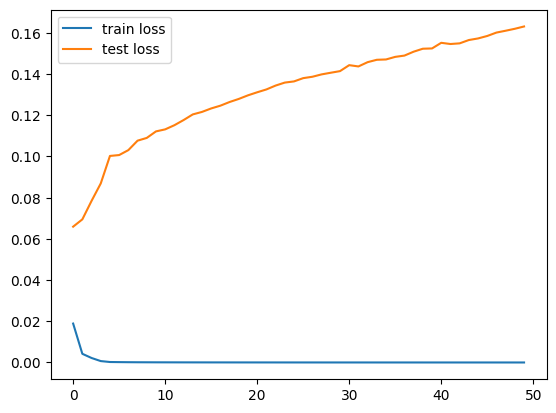

In [129]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='test loss')
plt.legend()
plt.show()

In [ ]:
def cleaning(text):
    clean=''.join([i for i in text if i not in string.punctuation])
    clean=clean.lower()
    clean=nltk.word_tokenize(clean)
    clean = [i for i in clean if i not in stopwords]
    clean=[stemmer.stem(word) for word in clean]
    clean=' '.join(word for word in clean)
    clean=[one_hot(word,vocab_size) for word in clean]
    clean=pad_sequences(clean,padding='pre',maxlen=200)
    return clean

In [137]:
data=data['text'].apply(lambda x:cleaning(x))

KeyboardInterrupt: 

In [ ]:
data